In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn import svm
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from google.colab import drive
import datetime
import seaborn as sns
from collections import Counter
import math
drive.mount('/content/drive')
path = '/content/drive/MyDrive/Assingment/Multi_Class Classification'
train = pd.read_csv(path + '/train.csv')
test = pd.read_csv(path + '/test.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Index(['fixed acidity', 'wine type', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'],
      dtype='object')


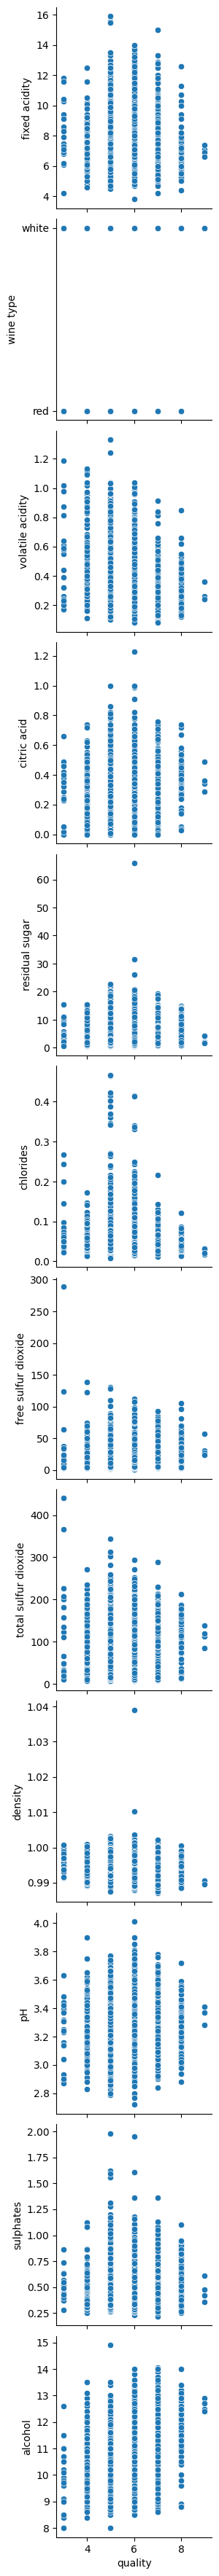

In [ ]:
X_ = ['quality']
y_ = train.drop(columns=['quality', 'ID']).columns
print(y_)
sns.pairplot(train, x_vars=X_, y_vars=y_,height=3, aspect=1, kind='scatter')

In [ ]:
train.head()

,ID,fixed acidity,wine type,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,9.0,white,0.27,0.35,4.9,0.028,27.0,95.0,0.99320,3.04,0.40,11.3,6
1,1,7.1,white,0.36,0.37,4.8,0.019,39.0,114.0,0.99036,3.08,0.49,12.7,7
2,2,6.4,white,0.18,0.48,4.0,0.186,64.0,150.0,0.99450,3.06,0.40,9.3,5
3,3,6.7,white,0.33,0.49,1.6,0.167,20.0,94.0,0.99140,3.11,0.50,11.4,6
4,4,6.2,white,0.25,0.31,3.2,0.030,32.0,150.0,0.99014,3.18,0.31,12.0,6


In [ ]:
def discrete(j, data, data1):
    A = []
    c = 0
    B = {}
    D = []
    G = []
    Count = {}
    drop = []
    column_values = data[j]
    CF = data1[j]

    for i in column_values:
        if i not in A:
            A.append(i)
            c = c + 1
            B[i] = c
        D.append(B[i])

    for k in CF:
        G.append(B[k])

    for idx,e in enumerate(CF):
        if e in Count:
            Count[e] += 1

        else:
            Count[e] = 1
        if Count[e] > 70:
          drop.append(idx)

    return G

wine_type_values = discrete('wine type', train, train)
wine_type_values1 = discrete('wine type',train, test)
print(wine_type_values1)



[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [ ]:
train = train.drop(columns=['wine type'])
train['wine type'] = wine_type_values
test = test.drop(columns=['wine type'])
test['wine type'] = wine_type_values1

In [ ]:
print(train.columns)
corr = train.corr()['quality']
print(corr.sort_values(ascending=False))

Index(['ID', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality', 'wine type'],
      dtype='object')
quality                 1.000000
alcohol                 0.447462
citric acid             0.089055
free sulfur dioxide     0.055967
sulphates               0.042673
pH                      0.019506
ID                     -0.004311
residual sugar         -0.036536
total sulfur dioxide   -0.037648
fixed acidity          -0.082934
wine type              -0.126577
chlorides              -0.205877
volatile acidity       -0.265244
density                -0.310686
Name: quality, dtype: float64


In [ ]:
columns = ['wine type' ]
train = pd.get_dummies(train, columns=columns)
test = pd.get_dummies(test, columns=columns)

In [ ]:
free sulfur dioxide     0.055967
sulphates               0.042673
pH                      0.019506
ID                     -0.004311
residual sugar         -0.036536
total sulfur dioxide   -0.037648
fixed acidity

In [ ]:
X_train = train.drop(columns=['quality','ID']) #,'free sulfur dioxide','sulphates','pH','residual sugar','total sulfur dioxide','fixed acidity'])
y_train = train['quality']
X_test = test.drop(columns=['ID']) #,'free sulfur dioxide','sulphates','pH','residual sugar','total sulfur dioxide','fixed acidity'])

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
def Multiclass_classificatio(X, y):
  model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=10000)
  model.fit(X, y)
  return model

def Performence(model, X, y):
  y_pred = model.predict(X)
  accuracy = accuracy_score(y, y_pred)
  _report = classification_report(y, y_pred)
  Confusion_matrix = confusion_matrix(y, y_pred)
  F1_score = f1_score(y, y_pred, average='macro')
  return y_pred, accuracy, _report, Confusion_matrix, F1_score

In [ ]:
model = Multiclass_classificatio(X_train, y_train)
y_pred, accuracy, _report, Confusion_matrix, F1_score = Performence(model, X_train, y_train)
print(F1_score)

0.24170299446496796


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
X_train.shape

(4873, 13)

In [ ]:
model1 = svm.SVC(kernel='linear')
model1.fit(X_train, y_train)
y_pred, accuracy, _report, Confusion_matrix, F1_score = Performence(model1, X_train, y_train)
print(F1_score)

0.17175315624653584


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred, accuracy, _report, Confusion_matrix, F1_score = Performence(clf, X_train, y_train)
print(F1_score)

1.0


In [ ]:
import tensorflow as tf
from tensorflow import keras
X_train = X_train.reshape(-1,4873,13)
my_numpy_array = y_train.to_numpy()  # Convert the Series to a NumPy array

# Now, you can use the 'reshape' method on the NumPy array
y_train = my_numpy_array.reshape(-1,4873,)
#y_train = y_train.reshape(-1,4873,)

# Define the model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(4873, 13)),  # Input layer
    keras.layers.Dense(4873, activation='softmax')  # Output layer with softmax activation
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=1, batch_size=1)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)


In [ ]:
Y_test = clf.predict(X_test)
A, = Y_test.shape
ID = np.arange(A)
df = pd.DataFrame({'price': Y_test, 'ID': ID})
csv = '/content/drive/MyDrive/Assingment/Multi_Class Classification/Arun_Dilli_Submission_dtree.csv'
df.to_csv(csv, index=False)

In [ ]:
from PIL import ImageGrab

# Capture a screenshot of the entire screen
screenshot = ImageGrab.grab()

# Save the screenshot to a file
screenshot.save("screenshot.png")

# Display the screenshot (optional)
screenshot.show()

OSError: X connection failed: error 5

In [ ]:
from sklearn.preprocessing import OneHotEncoder

labels = [1, 2, 3, 2, 5]


labels = np.array(labels).reshape(-1, 1)


encoder = OneHotEncoder(sparse=False)


one_hot_labels = encoder.fit_transform(labels)

print("One-Hot Labels:")
print(one_hot_labels)


One-Hot Labels:
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [13]:
y=8
r=lambda x:x*2
s=lambda x:x*3
w=2
w=r(w)
w=s(w)
w=r(w)
print(w)

24


In [3]:
print(9//2)

4


In [9]:
p = (1%2)
print(p)

1


In [10]:
import numpy as np
a= np.array([7,5,6])
b= np.array([2])
print(a+b)

[9 7 8]


In [12]:
print(type(5//2))

<class 'int'>


In [14]:
from sklearn.neural_network import MLPClassifier

# Define the inputs and outputs
X = [[0, 0, 1], [0, 1, 1], [1, 0, 1], [1, 1, 1]]
y = [0, 1, 1, 0]

# Create a neural network classifier
clf = MLPClassifier(hidden_layer_sizes=(4,), activation='relu', solver='adam', max_iter=1000, random_state=1)

# Train the classifier
clf.fit(X, y)

# Predict the output for the provided inputs
predictions = clf.predict(X)

print("Predictions:", predictions)


Predictions: [0 1 1 1]
